## Dimensionality Reduction

- ***Dimensionality reduction;*** Alternative way to reduce the complexity of the model and avoid overfitting.
    - ***Feature selection;*** Select a subset of the original features.
    - ***Feature extraction;*** Derive information from the feature set to construct a new feature subspace.
    
    
- **Principal component analysis (PCA)** for unsupervised data compression.
- **Linear Discriminant Analysis (LDA)** as a supervised dimensionality reduction technique for maximizing class separability
- Nonlinear dimensionality reduction via **kernal principal component analysis**
---

#### Kernel Principal Component Analysis (K-PCA)

- Using kernel PCA, transform data that is not linearly seperable onto a new, lower-dimensional subspace that is suitable for linear classifiers.  


- via kernel PCA, perform nonlinear mapping that transforms the data onto a higher-dimensional space and use standard PCA in this higher-dimensional space to project data back onto a lower-dimensional space, where the samples can be separated by linear classifier.  


- Uses the 'kernel trick', to compute the similarity between two high-deimension feature vectors in the original feature space. Calculate a dot product between two vectors.


- The most common kernels are
  - Polynomial Kernel
  - Hyperbolic tangent (sigmoid) Kernel
  - Radial Basis Function (RBF) or Gaussian kernel
  
  
#### Implementation Steps

1. Compute the kernel (similarity) matrix **k**.
2. We center the kernel matrix **k**.
3. Collect the top k eigenvectors for the centered kernel matrix based on their corresponding eigenvalues, which are ranked by decreasing magnitude. 

  

In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

import numpy as np

In [23]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    ----------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float - Tuning parameter of the RBF kernel
    
    n_components: int - Number of principal components to return
    
    Returns
    ----------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features] - Projected dataset
    """
    
    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

#### Example 1

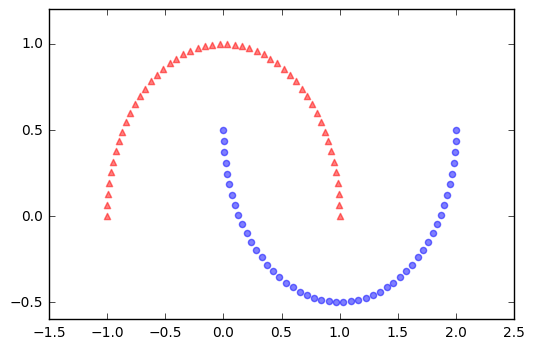

In [24]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.show()

Project the dataset onto the principal components via a standard PCA. Cearly, you can see the linear classifier would be unable to perform well on the dataset transformed via standard PCA

#### With standard PCA

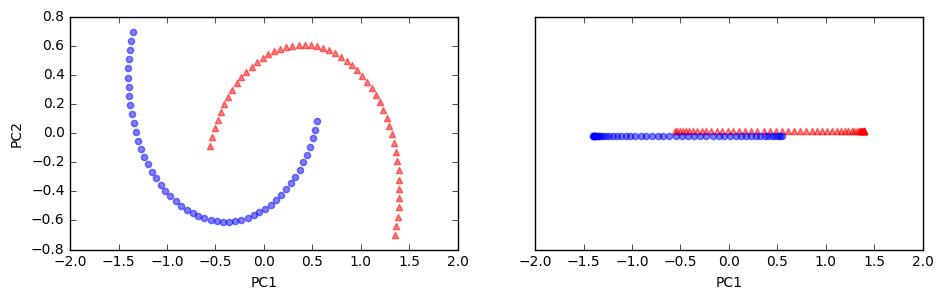

In [25]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

Next, lets try using our kernel PCA function

#### With kernel PCA

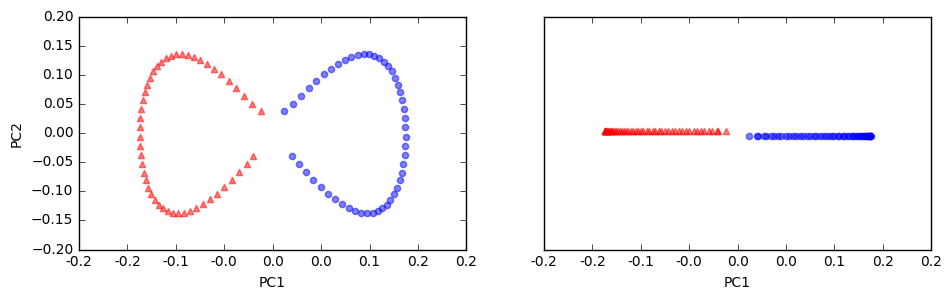

In [26]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

---
#### Example 2

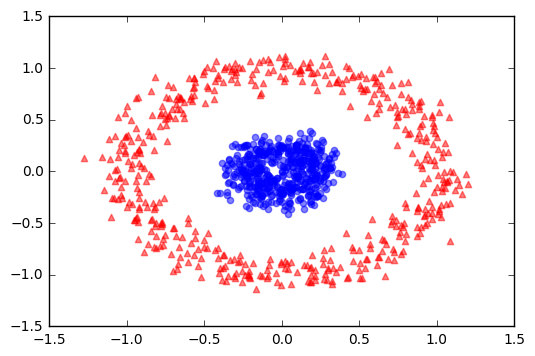

In [27]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.show()

#### With standard PCA

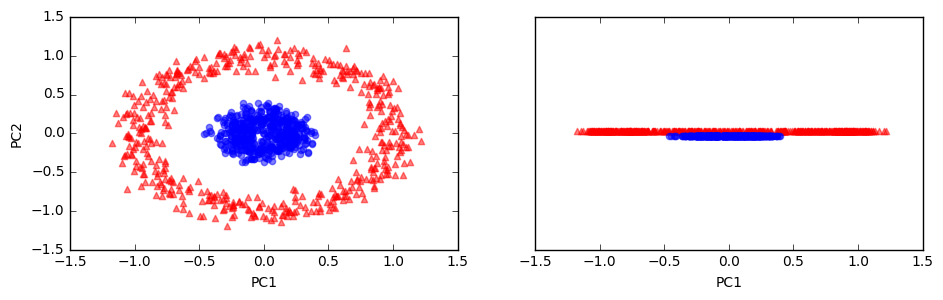

In [28]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

#### With kernel PCA

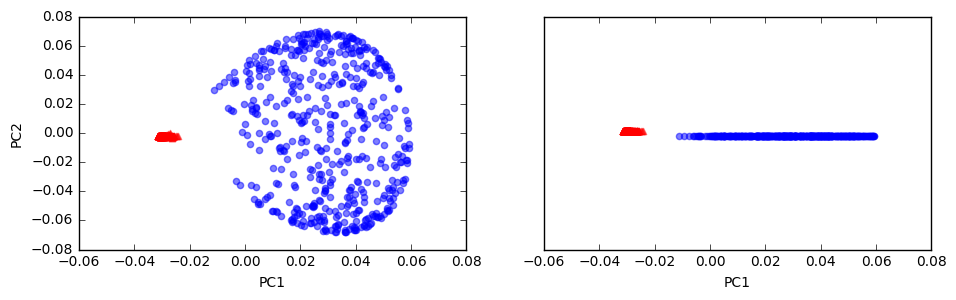

In [29]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

### Kernel Principal Component Analysis in scikit-learn

In [31]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

X_skernpca = scikit_kpca.fit_transform(X)

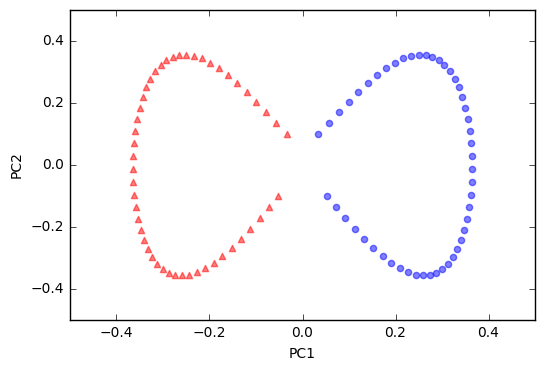

In [36]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Overview of current implementations in scikit-learn for nonlinear dimensionality reduction: http://scikit-learn.org/stable/modules/manifold.html